## Least Squares Regression

### Polynomials With Trigonometric Terms

In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt

### What would happen if we had a quadratic function with a sin term at the end of it? 
##### The function could look like 
\$y = ax^2+bx+\sin(x)+c$

##### Or, with four unknowns
\$y = ax^2+bx+c\sin(x)+d$

##### Or even with five unknowns
\$y = ax^2+bx+c\sin(x+d)+e$

*Note: It's not possible to use least squares linear regression to find unknown c in $y = ax^2+bx+\sin(cx)+e$ , see nonlinear_sin_explanation for explanation*

### Let's try an example. 

### We'll use function $y = 3x^2 + 2x + 100\sin(x)+100$

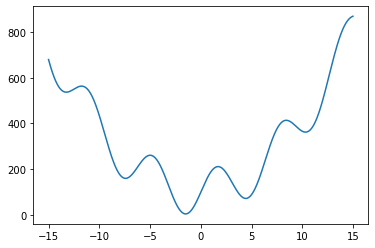

In [47]:
N = 1000
x = np.arange(-15,15,30/N)*1.0
y = 3*(x**2) + 2*x +100*np.sin(x)+100
plt.plot(x,y)

#### Plot random points around the line:

In [48]:
np.random.seed(3)
mean = 0
std_deviation = 20
noise = np.random.normal(mean, std_deviation, N)

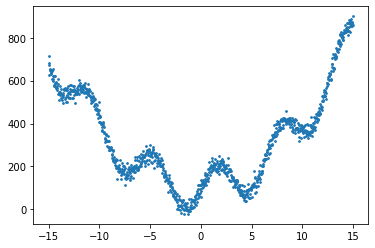

In [49]:
y_noise = y+noise
plt.scatter(x,y_noise,s=3)

### Now let's construct the Vandermonde matrix and calculate the line of best fit

##### Similar to the parabola example, our Vandermonde matrix this time will look like 
$
A = \begin{bmatrix}
x_1^2 & x_1 & \sin(x_1) & 1 \\
x_2^2 & x_2 & \sin(x_2) & 1 \\
\vdots & \vdots & \vdots & \vdots \\
x_n^2 & x_n & \sin(x_n) & 1 \\
\end{bmatrix}
$
##### Given data points  $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$
##### with corresponding coefficient vector X as 

$X =
\begin{bmatrix}
a \\
b \\
c \\
d \\
\end{bmatrix}
$


In [50]:
b = y_noise
A = np.zeros((1000,5))
A[:,0] = x**2; A[:,1] = x; A[:,2] = np.cos(x); A[:,3] = np.sin(x); A[:,4] = 1

#### Use same formula $(A^TA)^{-1}A^Tb$  to find coefficient vector $X$

In [51]:
AT = np.transpose(A)
ATA_inverse = np.linalg.inv(np.dot(AT,A))
ATb = np.dot(AT,b)
X = np.dot(ATA_inverse, ATb)

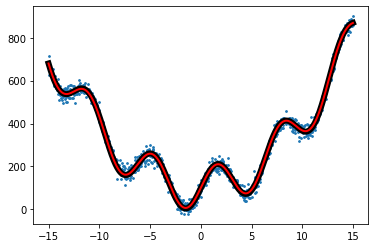

In [52]:
y_calc = X[0]*x**2+X[1]*x+X[3]*np.sin(x)+X[4]
plt.scatter(x,y_noise,s=3)
plt.plot(x,y,color = "black", linewidth = 6)
plt.plot(x,y_calc, color = "red", linewidth = 2)
plt.show()

#### Cool! That looks like it fits quite well!
### Let's add another element. Now we'll try the function $y = 3x^2+2x+100\sin(x+40)+100$

In [53]:
np.sin(np.pi)

1.2246467991473532e-16

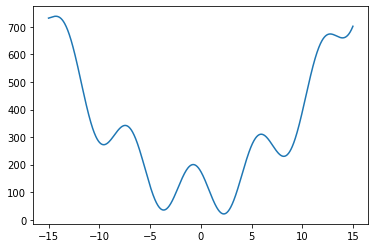

In [54]:
N = 1000
x = np.arange(-15,15,30/N)*1.0
y = 3*(x**2) + 2*x +100*np.sin(x+40)+100
plt.plot(x,y)

In [55]:
np.random.seed(3)
mean = 0
std_deviation = 20
noise = np.random.normal(mean, std_deviation, N)


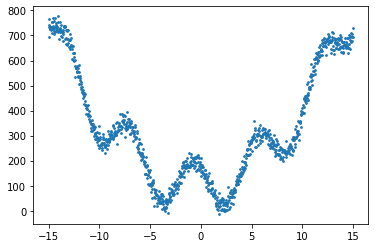

In [56]:
y_noise = y+noise
plt.scatter(x,y_noise,s=3)

### Construct Vandermonde Matrix

#### How do we account for that extra element within the sin function?


##### Now that our function has the format $y = ax^2+bx+c\sin(x+d)+e$, how do we find that new element $d$?
##### This is the method I found:
##### We'll employ the trigonometric identity $c\sin(x+d) = c[\sin(x)\cos(d) + \sin(d)\cos(x)]$ 
##### so that our function can be rewritten as $y = ax^2+bx+c\cos(d)\sin(x)+c\sin(d)\cos(x)+e$
##### This way, our features are now
1. $x^2$
2. $x$
3. $\sin(x)$
4. $\cos(x)$

##### and we can construct the Vandermonde matrix in the following format:
$A=
\begin{bmatrix}
x_1^2 & x_1 & \sin(x_1) & \cos(x_1) & 1 \\
x_2^2 & x_2 & \sin(x_2) & \cos(x_2) & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
x_n^2 & x_n & \sin(x_n) & \cos(x_n) & 1 \\
\end{bmatrix}
$
##### with corresponding coefficient vector X as 
$X=
\begin{bmatrix}
a \\
b \\
c\cos(d) \\
c\sin(d) \\
e \\
\end{bmatrix}
$
##### To get unknown $d$, we can divide $c\sin(d)$ over $c\cos(d)$ from vector X, which will give us $\tan(d)$ so that $d = \arctan(X[3]/X[2])$. 
##### We can also get $c$ by dividing either $X[2] \over \cos(d)$ or $X[3] \over \sin(d)$. 



In [57]:
b = y_noise
A = np.zeros((1000,5))
A[:,0] = x**2; A[:,1] = x; A[:,2] = np.sin(x); A[:,3] = np.cos(x); A[:,4] = 1

In [58]:
AT = np.transpose(A)
ATA_inverse = np.linalg.inv(np.dot(AT,A))
ATb = np.dot(AT,b)
X = np.dot(ATA_inverse, ATb)

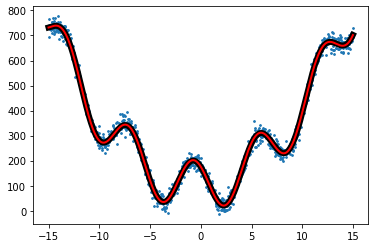

[  2.99554337   2.05375331 -68.45644541  74.40477879 100.68421314]
c: -101.10566762001353
d: -0.8270112710736386


In [59]:
d = np.arctan(X[3]/X[2])
c = X[3]/np.sin(d)
y_calc = X[0]*x**2+X[1]*x+c*np.sin(x+d)+X[4]
plt.scatter(x,y_noise,s=3)
plt.plot(x,y,color = "black", linewidth = 6)
plt.plot(x,y_calc, color = "red", linewidth = 2)
plt.show()
print(X)
print("c:",c);print("d:",d)

#### Wow! Looks like that works really well, but our $c$ and $d$ values don't match the original. How come our graph still looks the same?
##### The graph still looks the same because although the value calculated for $c$ is negative, due to this trigonometric identity:
##### $\sin(\theta+\pi) = -\sin(\theta)$
##### Our calculated equation's $-101.11\sin(x-0.83)$ can be rewritten as $101.11\sin(x+2.31)$ by adding $\pi$ to $d$.
##### Here's our calculated equation side by side with the original:
##### $y = 3.00x^2+2.05x+101.11\sin(x+2.31)+100.68$
##### $y = 3x^2+2x+100\sin(x+40)+100$


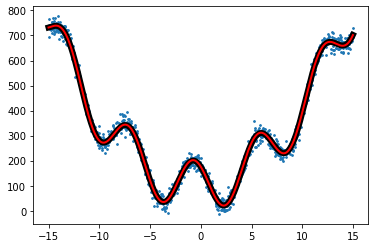

[  2.99554337   2.05375331 -68.45644541  74.40477879 100.68421314]
c: 101.10566762001352
d: 2.3145813825161543


In [60]:
d = np.arctan(X[3]/X[2])+np.pi 
c = X[3]/np.sin(d)
y_calc = X[0]*x**2+X[1]*x+c*np.sin(x+d)+X[4]
plt.scatter(x,y_noise,s=3)
plt.plot(x,y,color = "black", linewidth = 6)
plt.plot(x,y_calc, color = "red", linewidth = 2)
plt.show()
print(X)
print("c:",c);print("d:",d)

#### As we can see, after adding $\pi$ to $d$, our graph remains the same!

#### Our calculated function looks much closer to the original now that $c$ is positive, but what about the value of $d$? There seems to be a pretty big difference between +40 versus +2.31! 
##### Remember, there are actually a *lot* of solutions for the value of $d$, because 
##### $\sin(x+d) = \sin(x+d+2\pi n)$
##### If you add $2\pi n$ to $d$ where $n$ is any integer, you will get the same result!
##### Let's see a list of some other potential solutions for d:

In [61]:
np.array([2.31458+2*np.pi*n for n in range(5,10)])

array([33.73050654, 40.01369184, 46.29687715, 52.58006246, 58.86324776])

#### Look! If we add $12\pi$ to our current value of $d$, we'll get 40.01, which is super close to 40!